# Homework 2

Deadline: lab session in the week of **25-28.11.2024**
Each task is worth 1 point.

## 1. Maximization of Functions using Gradient Descent



**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.


Maximizing f(x)=−x4+4x2−2x+1

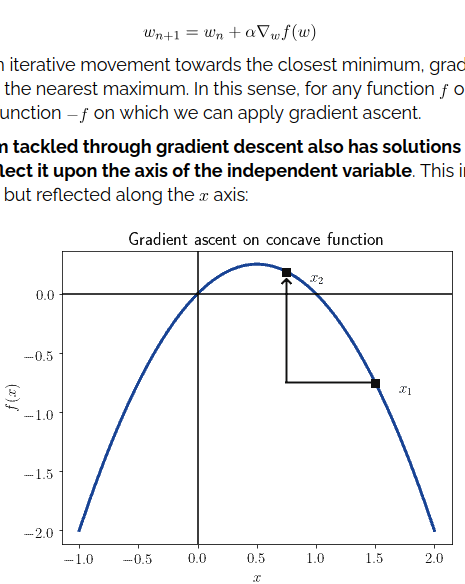 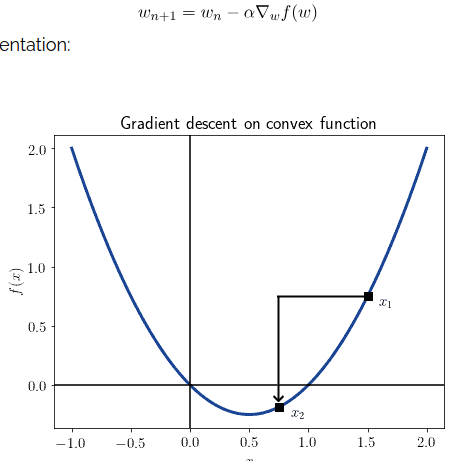

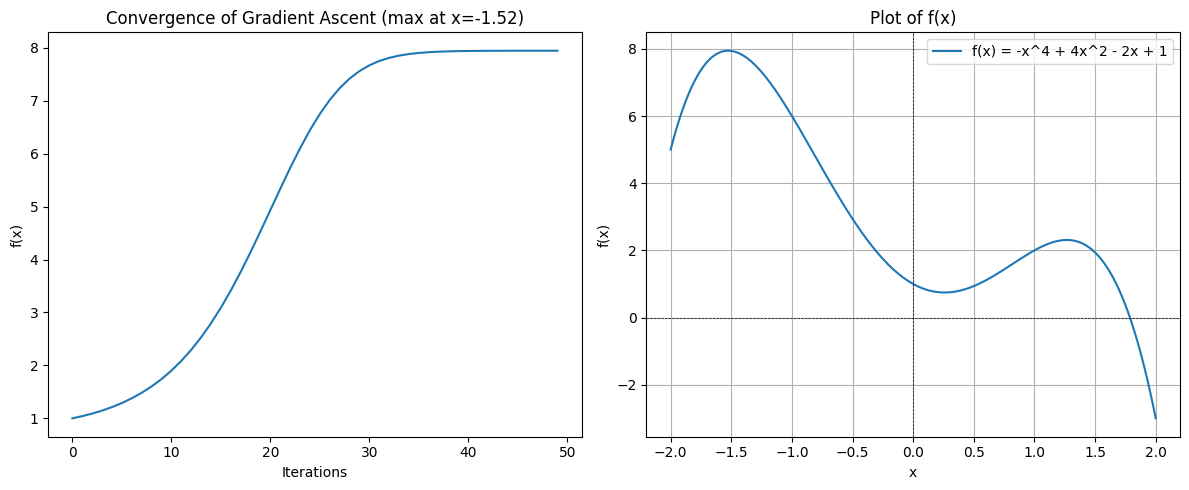

In [1067]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def f(x): # funkcja z (a)
    return -x**4 + 4*x**2 - 2*x + 1

def fun_max_1D(alfa=0.01, iterations=100, initial_x=0.0):
    x = torch.tensor(initial_x, requires_grad=True)  
    values = []  

    for _ in range(iterations):
        f_val = f(x) 
        f_val.backward() 
        with torch.no_grad():  
            x += alfa * x.grad
            x.grad.zero_()  # Clear gradient
        values.append(f_val.item())

    return values, x.item()

learning_rate = 0.01
iterations = 50
initial_x = 0.0
values, max_x = fun_max_1D(learning_rate, iterations, initial_x)

plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)  
plt.plot(values)
plt.title(f"Convergence of Gradient Ascent (max at x={max_x:.2f})")
plt.xlabel("Iterations")
plt.ylabel("f(x)")

x_vals = np.linspace(-2, 2, 500)
y_vals = -x_vals**4 + 4*x_vals**2 - 2*x_vals + 1
plt.subplot(1, 2, 2)  
plt.plot(x_vals, y_vals, label="f(x) = -x^4 + 4x^2 - 2x + 1")
plt.title("Plot of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

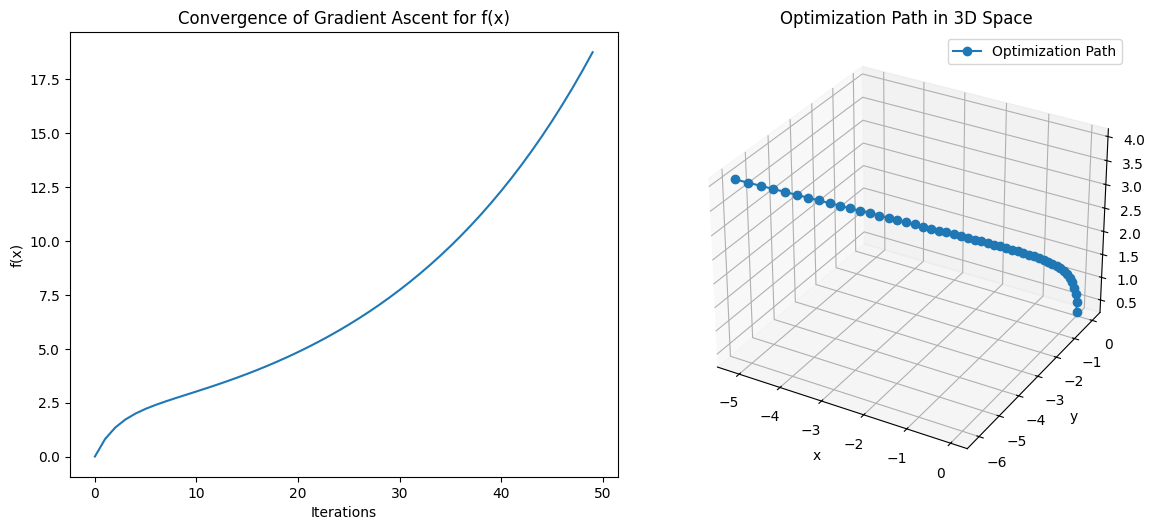

In [ ]:
def f(x, y, z): # funkcja z (b)
    return -x**2 - y**2 - z**2 + 2*x*y - y*z + 3*z

def fun_max_3D(alfa=0.01, iterations=100, initial_xyz=(0.0, 0.0, 0.0)):
    x = torch.tensor(initial_xyz[0], requires_grad=True)
    y = torch.tensor(initial_xyz[1], requires_grad=True)
    z = torch.tensor(initial_xyz[2], requires_grad=True)

    xyz_path = []
    values = []

    for _ in range(iterations):
        f_val = f(x, y, z)
        f_val.backward()
        with torch.no_grad():  
            x += alfa * x.grad
            y += alfa * y.grad
            z += alfa * z.grad

            # Clear gradients
            x.grad.zero_()
            y.grad.zero_()
            z.grad.zero_()

        xyz_path.append((x.item(), y.item(), z.item())) 
        values.append(f_val.item())  

    return values, xyz_path

learning_rate = 0.1
iterations = 50
initial_xyz = (0.0, 0.0, 0.0)
values, path = fun_max_3D(learning_rate, iterations, initial_xyz)

x_vals_3d = np.linspace(-2, 2, 50)
y_vals_3d = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x_vals_3d, y_vals_3d)
Z = f(X, Y, 0)  # Set z=0 for visualization

# Create a figure with subplots
fig = plt.figure(figsize=(12, 10))

# First subplot: Convergence of Gradient Ascent (f(x))
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(values)
ax1.set_title("Convergence of Gradient Ascent for f(x)")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("f(x)")

# 2: Optimization path in 3D
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
x_path, y_path, z_path = zip(*path)
ax2.plot(x_path, y_path, z_path, marker='o', label='Optimization Path')
ax2.set_title("Optimization Path in 3D Space")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.legend()

plt.tight_layout()
plt.show()

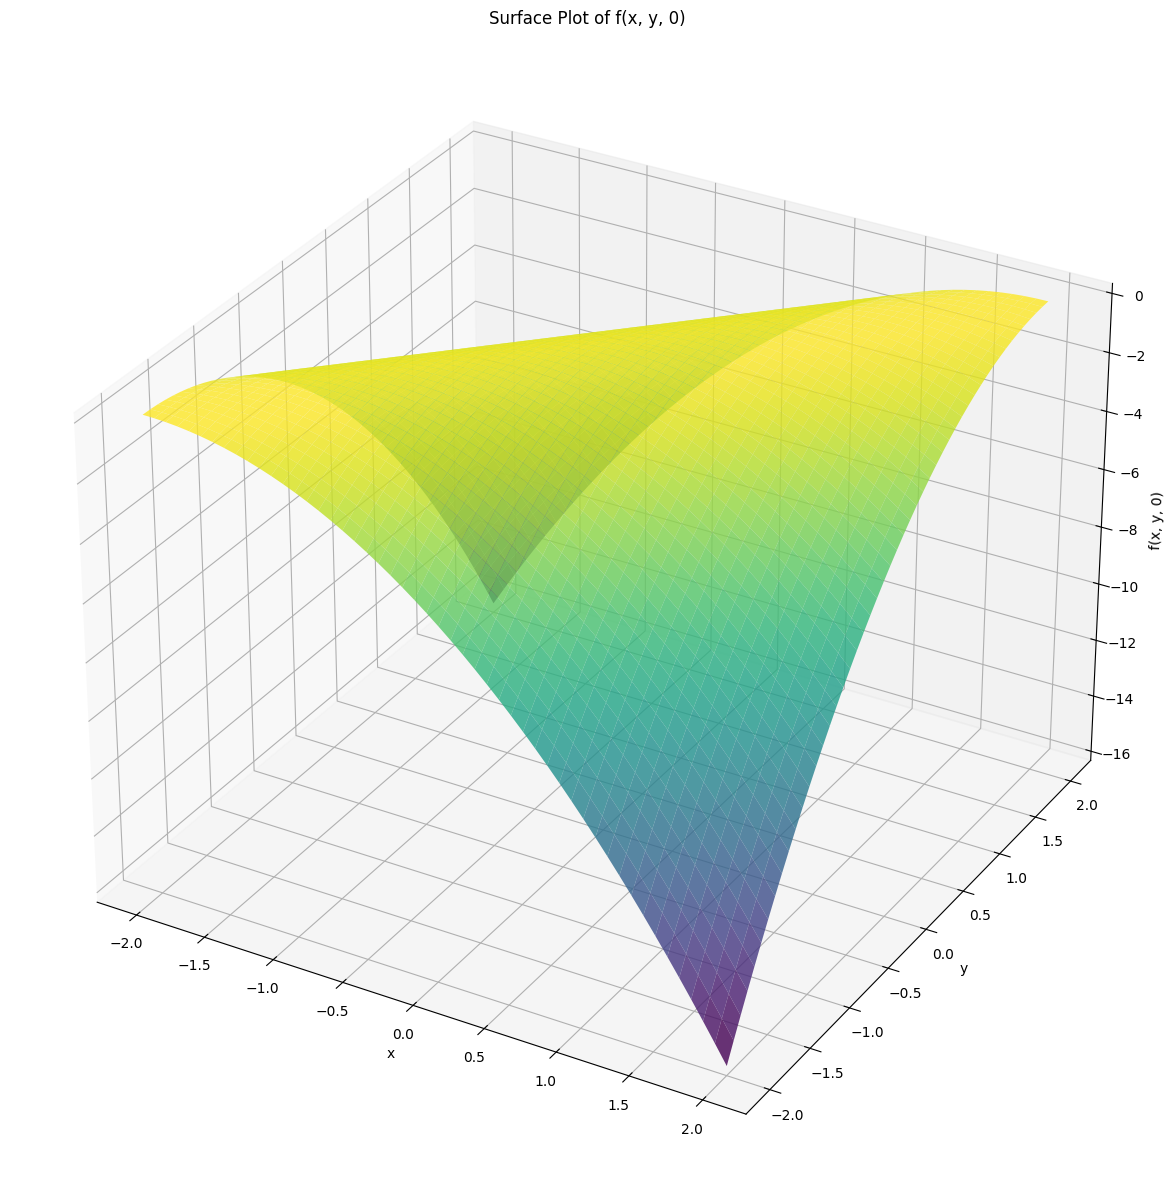

In [1069]:
# Surface plot of f(x, y, 0)
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x, y, 0)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y, 0)')

plt.show()

## 2. Linear Regression in PyTorch


**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:


In [1070]:

import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon



**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).


In [1071]:
# Convert
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


In [1072]:
X_tensor.shape

torch.Size([100, 1])

In [1073]:
X_tensor.shape

torch.Size([100, 1])

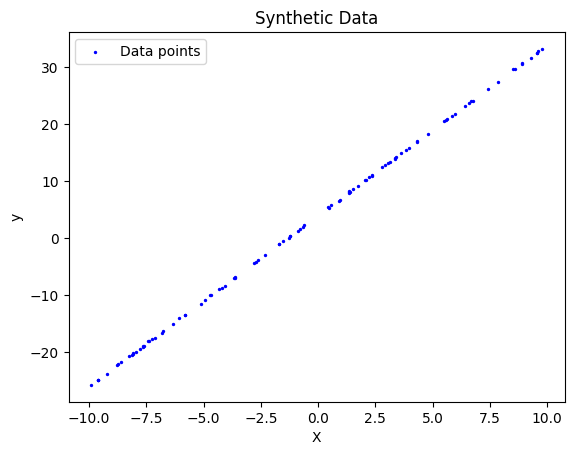

In [1074]:
plt.scatter(X, y, color='blue', label='Data points', s=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.legend()
plt.show()

In [ ]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # out - y_pred (1D)

    def forward(self, x):
        return self.linear(x)

In [1076]:
model = LinearRegressionModel()

criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

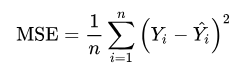

Yi​ is the true value (target)\
Yi​^​ is the predicted value\
n is the number of samples

In [1077]:
epochs = 1000
for epoch in range(epochs):

    y_pred = model(X_tensor) # pass x through model
    
    loss = criterion(y_pred, y_tensor) # MSE loss
    
    optimizer.zero_grad() # clear
    loss.backward()  # grads

    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.2058
Epoch [200/1000], Loss: 0.0135
Epoch [300/1000], Loss: 0.0100
Epoch [400/1000], Loss: 0.0099
Epoch [500/1000], Loss: 0.0099
Epoch [600/1000], Loss: 0.0099
Epoch [700/1000], Loss: 0.0099
Epoch [800/1000], Loss: 0.0099
Epoch [900/1000], Loss: 0.0099
Epoch [1000/1000], Loss: 0.0099


Loss after one step: 0.0099
Learned weight: 2.9997, Learned bias: 4.0191


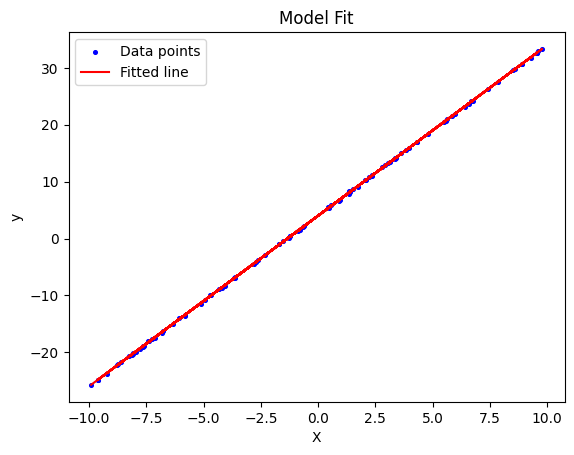

In [1078]:
print(f'Loss after one step: {loss.item():.4f}')
with torch.no_grad():
    weight, bias = model.linear.parameters()
    print(f'Learned weight: {weight.item():.4f}, Learned bias: {bias.item():.4f}')

    plt.scatter(X, y, color='blue', label='Data points', s=7)
    plt.plot(X, model(torch.tensor(X, dtype=torch.float32).view(-1, 1)).detach().numpy(), color='red', label='Fitted line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title('Model Fit')
    plt.show()

## 3. Learning Rate Analysis


**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.


In [1079]:
def train_with_lr(learning_rate, epochs=1000):

    model = LinearRegressionModel()
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    loss_list = []

    for epoch in range(epochs):
        y_pred = model(X_tensor)
        loss = criterion(y_pred, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())

        if (epoch + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    return loss_list

Training with learning rate 0.01
Epoch [100/1000], Loss: 0.1869
Epoch [200/1000], Loss: 0.0132
Epoch [300/1000], Loss: 0.0100
Epoch [400/1000], Loss: 0.0099
Epoch [500/1000], Loss: 0.0099
Epoch [600/1000], Loss: 0.0099
Epoch [700/1000], Loss: 0.0099
Epoch [800/1000], Loss: 0.0099
Epoch [900/1000], Loss: 0.0099
Epoch [1000/1000], Loss: 0.0099
Training with learning rate 0.001
Epoch [100/1000], Loss: 9.3719
Epoch [200/1000], Loss: 6.3055
Epoch [300/1000], Loss: 4.2437
Epoch [400/1000], Loss: 2.8571
Epoch [500/1000], Loss: 1.9247
Epoch [600/1000], Loss: 1.2976
Epoch [700/1000], Loss: 0.8759
Epoch [800/1000], Loss: 0.5923
Epoch [900/1000], Loss: 0.4016
Epoch [1000/1000], Loss: 0.2733


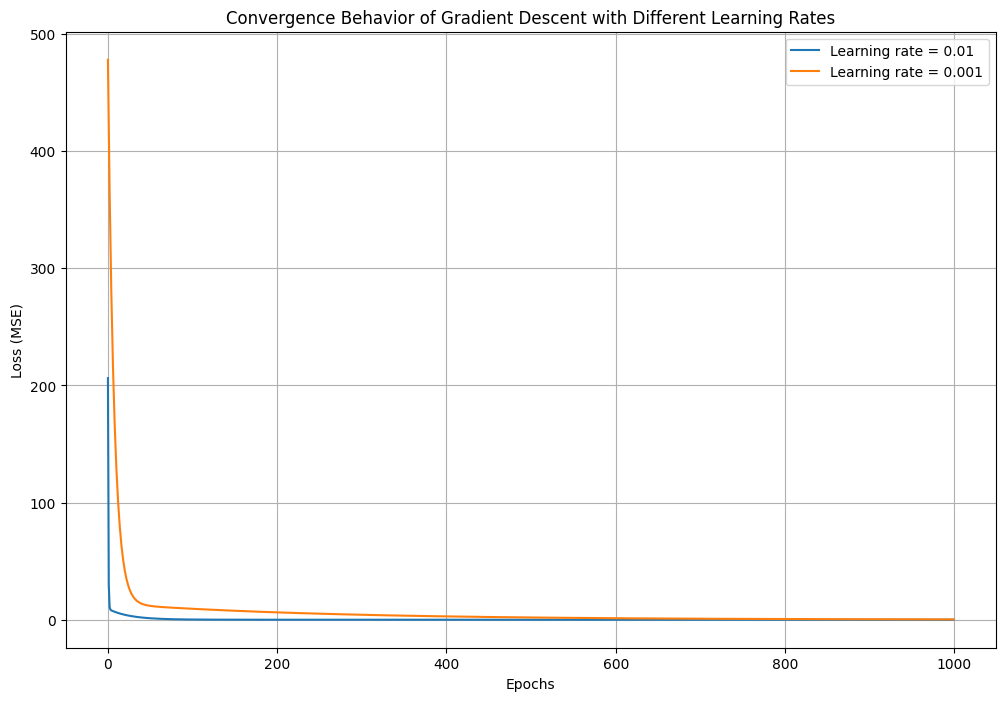

In [1080]:
learning_rates = [0.01, 0.001] #(jedyne sensowne)
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    print(f"Training with learning rate {lr}")
    
    loss_list = train_with_lr(lr)

    plt.plot(loss_list, label=f"Learning rate = {lr}")

plt.title("Convergence Behavior of Gradient Descent with Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()

## 4. Polynomial Regression Extension


**Dataset**: Use the following code to create a dataset of 100 samples:


In [1081]:
from torch.utils.data import DataLoader, TensorDataset, random_split

In [1082]:
np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon


**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.


In [1083]:
# Convert
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

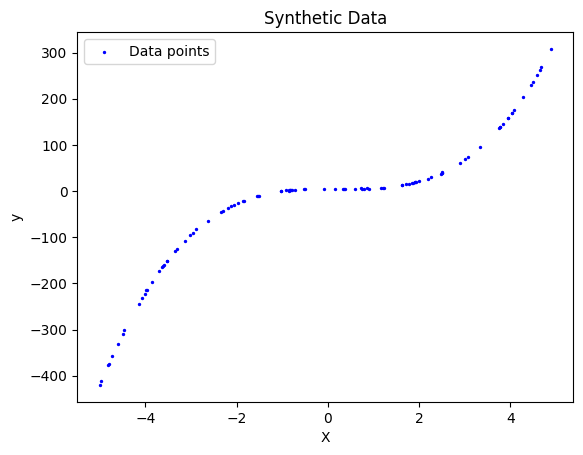

In [1084]:
plt.scatter(X, y, color='blue', label='Data points', s=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.legend()
plt.show()

In [1085]:
dataset = TensorDataset(X_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=10, shuffle=True) #for SGD

In [ ]:
class PolynomialRegression(torch.nn.Module):
    def __init__(self, degree):
        super(PolynomialRegression, self).__init__()
        self.poly = torch.nn.Linear(degree + 1, 1, bias=True) # n-degree -> [1,x,x^2,...x^n] n+1 elem.
        
    def forward(self, x):
        poly_features = torch.cat([x**i for i in range(degree + 1)], dim=1)
        return self.poly(poly_features) # = w0 + w1x + ... + bias = Y^

In [1087]:
degree = 3
poly_model = PolynomialRegression(degree)

linear_model = torch.nn.Linear(1, 1)

In [ ]:
loss_fn = torch.nn.MSELoss()
poly_optimizer = torch.optim.SGD(poly_model.parameters(), lr=0.000001) # the best learning rates I found
linear_optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.0001)

In [1089]:
epochs = 1000
poly_losses = []
linear_losses = []

for epoch in range(epochs):
    poly_epoch_loss = 0
    linear_epoch_loss = 0

    for X_batch, y_batch in data_loader:
        # Polynomial forward
        poly_output = poly_model(X_batch)
        poly_loss = loss_fn(poly_output, y_batch)
        
        # Linear forward
        linear_output = linear_model(X_batch)
        linear_loss = loss_fn(linear_output, y_batch)

        # Poly back
        poly_optimizer.zero_grad()
        poly_loss.backward()
        poly_optimizer.step()

        # Linear bakc
        linear_optimizer.zero_grad()
        linear_loss.backward()
        linear_optimizer.step()

        poly_epoch_loss += poly_loss.item()
        linear_epoch_loss += linear_loss.item()
        
    poly_losses.append(poly_epoch_loss / len(data_loader))
    linear_losses.append(linear_epoch_loss / len(data_loader))

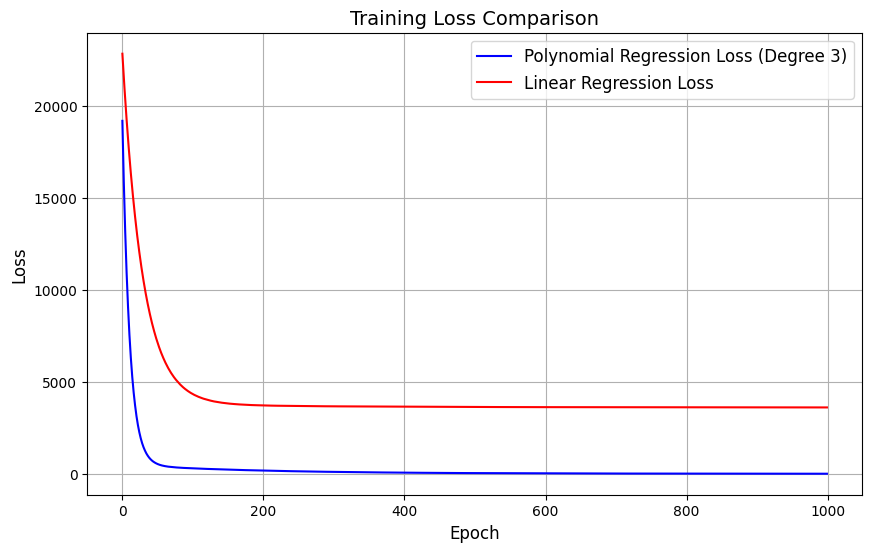

Final Polynomial Regression Loss: 16.8462
Final Linear Regression Loss: 3620.9424


In [1090]:
plt.figure(figsize=(10, 6))
plt.plot(poly_losses, label="Polynomial Regression Loss (Degree 3)", color="blue")
plt.plot(linear_losses, label="Linear Regression Loss", color="red")
plt.title("Training Loss Comparison", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

print(f"Final Polynomial Regression Loss: {poly_losses[-1]:.4f}")
print(f"Final Linear Regression Loss: {linear_losses[-1]:.4f}")

## 5. Overfitting and Regularization


**Dataset**: Use the following code to generate a dataset with 150 samples:


In [1091]:

np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon



**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.


In [ ]:
X_min, X_max = X.min(), X.max()
X_scaled = 2 * (X - X_min) / (X_max - X_min) - 1  # [-1, 1]

In [1093]:
# Convert
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

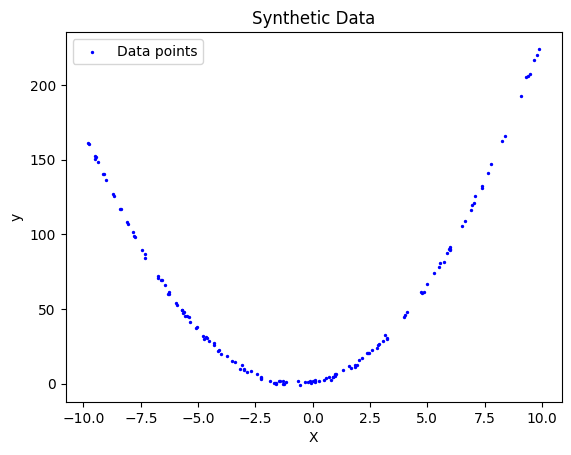

In [1094]:
plt.scatter(X, y, color='blue', label='Data points', s=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.legend()
plt.show()

In [1095]:
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))  # 80/20 split
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)

In [1096]:
degree = 3
linear_model = torch.nn.Linear(1, 1) 
poly_model = PolynomialRegression(degree)  

In [1097]:
loss_fn = torch.nn.MSELoss()

linear_optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.0001)
poly_optimizer = torch.optim.SGD(poly_model.parameters(), lr=0.000001, weight_decay=0.01)  # L2

In [ ]:
# Training loop
epochs = 200
linear_train_losses = []
linear_val_losses = []
poly_train_losses = []
poly_val_losses = []

for epoch in range(epochs):
    linear_train_loss = 0
    poly_train_loss = 0

    # Training
    for X_batch, y_batch in train_loader:
        # Linear forward
        linear_output = linear_model(X_batch)
        linear_loss = loss_fn(linear_output, y_batch)

        # Linear back
        linear_optimizer.zero_grad()
        linear_loss.backward()
        linear_optimizer.step()
        linear_train_loss += linear_loss.item()

        # Poly forward
        poly_output = poly_model(X_batch)
        poly_loss = loss_fn(poly_output, y_batch)

        # Poly back
        poly_optimizer.zero_grad()
        poly_loss.backward()
        poly_optimizer.step()
        poly_train_loss += poly_loss.item()
    
    linear_train_losses.append(linear_train_loss / len(train_loader))
    poly_train_losses.append(poly_train_loss / len(train_loader))

    with torch.no_grad():
        for X_val, y_val in val_loader:
            linear_val_output = linear_model(X_val)
            linear_val_loss = loss_fn(linear_val_output, y_val).item()

            poly_val_output = poly_model(X_val)
            poly_val_loss = loss_fn(poly_val_output, y_val).item()

        linear_val_losses.append(linear_val_loss)
        poly_val_losses.append(poly_val_loss)

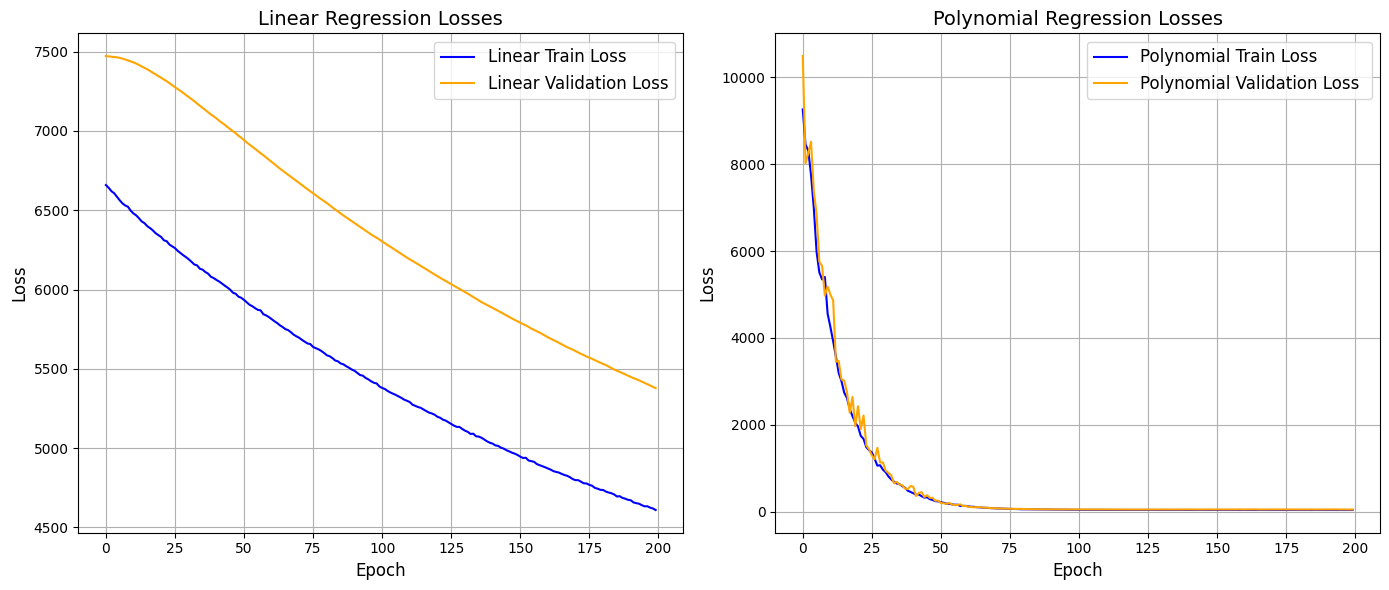

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(linear_train_losses, label="Linear Train Loss", color="blue")
plt.plot(linear_val_losses, label="Linear Validation Loss", color="orange")
plt.title("Linear Regression Losses", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(poly_train_losses, label="Polynomial Train Loss ", color="blue")
plt.plot(poly_val_losses, label="Polynomial Validation Loss ", color="orange")
plt.title("Polynomial Regression Losses", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

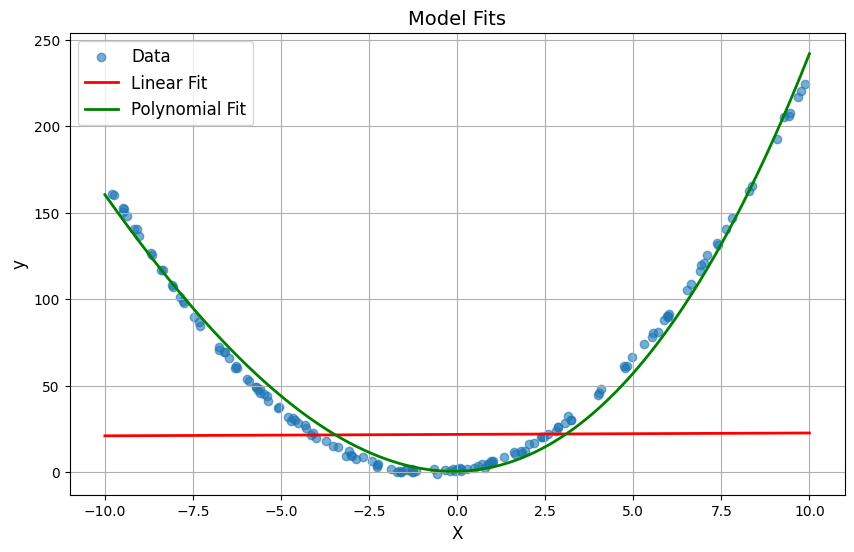

Final Linear Regression Training Loss: 4609.6941
Final Linear Regression Validation Loss: 5378.3647
Final Polynomial Regression Training Loss: 34.4357
Final Polynomial Regression Validation Loss: 45.9272


In [ ]:
with torch.no_grad():
    X_plot = torch.linspace(-10, 10, 500).view(-1, 1)
    linear_fit = linear_model(X_plot)
    poly_fit = poly_model(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data", alpha=0.6)
plt.plot(X_plot, linear_fit, label="Linear Fit", color="red", linewidth=2)
plt.plot(X_plot, poly_fit, label="Polynomial Fit", color="green", linewidth=2)
plt.title("Model Fits", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

print(f"Final Linear Regression Training Loss: {linear_train_losses[-1]:.4f}")
print(f"Final Linear Regression Validation Loss: {linear_val_losses[-1]:.4f}")
print(f"Final Polynomial Regression Training Loss: {poly_train_losses[-1]:.4f}")
print(f"Final Polynomial Regression Validation Loss: {poly_val_losses[-1]:.4f}")

## 6. Custom Gradient Descent in PyTorch


**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.


In [1101]:
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)  
epsilon = np.random.normal(0, 0.1, 100) 
y = 3 * X + 4 + epsilon  

In [1102]:
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [ ]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
def custom_gradient_descent(X_tensor, y_tensor, learning_rate, epochs=100):
    model = LinearRegressionModel()
    criterion = torch.nn.MSELoss()
    
    loss_list = []# to store loss values

    for epoch in range(epochs):
       
        y_pred = model(X_tensor) # pass x through model

        loss = criterion(y_pred, y_tensor)  # MSE

        model.zero_grad() 
        loss.backward() 

        # instead of "optimizer.step()"
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad

        loss_list.append(loss.item())

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    return loss_list

In [ ]:
def train_with_SGD_optimizer(X_tensor, y_tensor, learning_rate, epochs=100):
    model = LinearRegressionModel()
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    
    loss_list = []

    for epoch in range(epochs):
       
        y_pred = model(X_tensor) # pass through

        loss = criterion(y_pred, y_tensor)  # MSE

        optimizer.zero_grad() # clear
        loss.backward()

        optimizer.step()

        loss_list.append(loss.item())

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    return loss_list

In [1106]:
learning_rate = 0.01 

# Run custom gradient descent
custom_loss = custom_gradient_descent(X_tensor, y_tensor, learning_rate)

print('')

# Run  with SGD optimizer
sgd_loss = train_with_SGD_optimizer(X_tensor, y_tensor, learning_rate)

Epoch [10/100], Loss: 9.9886
Epoch [20/100], Loss: 6.6965
Epoch [30/100], Loss: 4.4906
Epoch [40/100], Loss: 3.0124
Epoch [50/100], Loss: 2.0218
Epoch [60/100], Loss: 1.3581
Epoch [70/100], Loss: 0.9133
Epoch [80/100], Loss: 0.6153
Epoch [90/100], Loss: 0.4156
Epoch [100/100], Loss: 0.2817

Epoch [10/100], Loss: 8.7343
Epoch [20/100], Loss: 5.8561
Epoch [30/100], Loss: 3.9274
Epoch [40/100], Loss: 2.6350
Epoch [50/100], Loss: 1.7689
Epoch [60/100], Loss: 1.1886
Epoch [70/100], Loss: 0.7998
Epoch [80/100], Loss: 0.5392
Epoch [90/100], Loss: 0.3646
Epoch [100/100], Loss: 0.2476


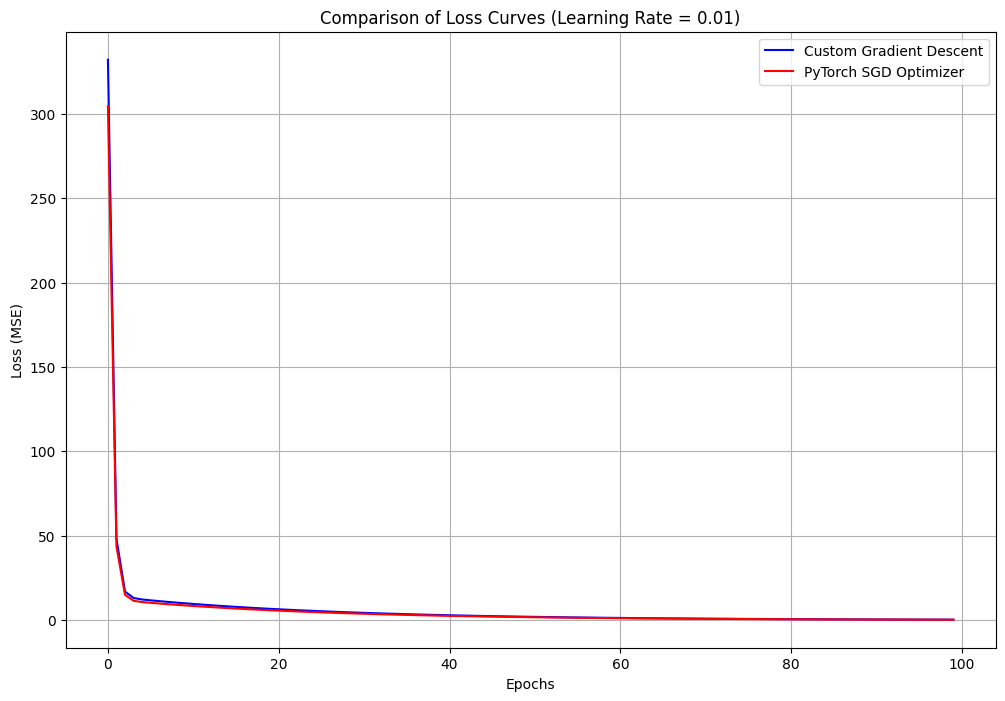

In [1107]:
plt.figure(figsize=(12, 8))

plt.plot(custom_loss, label="Custom Gradient Descent", color='blue')
plt.plot(sgd_loss, label="PyTorch SGD Optimizer", color='red')

plt.title(f"Comparison of Loss Curves (Learning Rate = {learning_rate})")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()

## 7. Dataset Size and Convergence


**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:


In [ ]:
np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))



**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.


In [ ]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
def train_model(X_train, y_train, epochs=10, learning_rate=0.01):
    model = LinearRegressionModel()
    criterion = torch.nn.MSELoss()  # Mean Squared Error loss
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    
    losses = [] 
    
    for epoch in range(epochs):
        model.train()
        
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())  # Save loss

    return losses

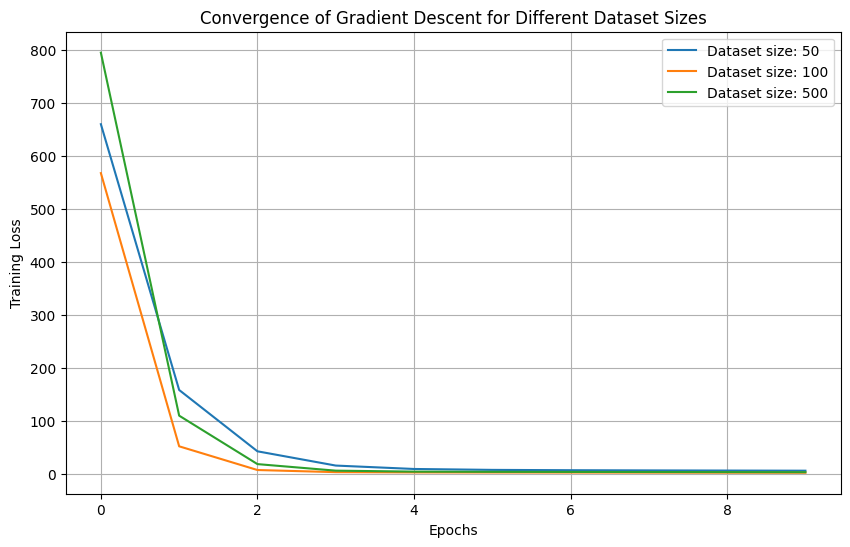

In [ ]:
plt.figure(figsize=(10, 6))

for i, (X, y) in enumerate(datasets):
    losses = train_model(X, y, epochs=10, learning_rate=0.01)
    plt.plot(range(10), losses, label=f"Dataset size: {sizes[i]}")

plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Convergence of Gradient Descent for Different Dataset Sizes')
plt.legend()
plt.grid(True)
plt.show()

## 8. Effect of Model Complexity on Overfitting


**Dataset**: Use the following code to generate a dataset of 200 samples:


In [1112]:

np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon



**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.


In [1113]:
X_min, X_max = X.min(), X.max()
X_scaled = 2 * (X - X_min) / (X_max - X_min) - 1

In [1114]:
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [1115]:
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)


In [ ]:
class PolynomialRegression(torch.nn.Module):
    def __init__(self, degree):
        super(PolynomialRegression, self).__init__()
        self.degree = degree
        self.poly = torch.nn.Linear(degree + 1, 1, bias=True) 
        
    def forward(self, x):
        poly_features = torch.cat([x**i for i in range(self.degree + 1)], dim=1)
        return self.poly(poly_features)

In [ ]:
def train_polynomial_model(degree, epochs=1000, lr=0.001, weight_decay=0.001):
    model = PolynomialRegression(degree)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()
    
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # train
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            output = model(X_batch)
            loss = loss_fn(output, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        # Val
        model.eval()
        with torch.no_grad():
            for X_val, y_val in val_loader:
                val_output = model(X_val)
                val_loss = loss_fn(val_output, y_val).item()
        val_losses.append(val_loss)

    return model, train_losses, val_losses

In [1118]:
degree_5_model, degree_5_train_losses, degree_5_val_losses = train_polynomial_model(degree=5, lr=0.001, weight_decay=0.01)
degree_15_model, degree_15_train_losses, degree_15_val_losses = train_polynomial_model(degree=15, lr=0.001, weight_decay=0.01)

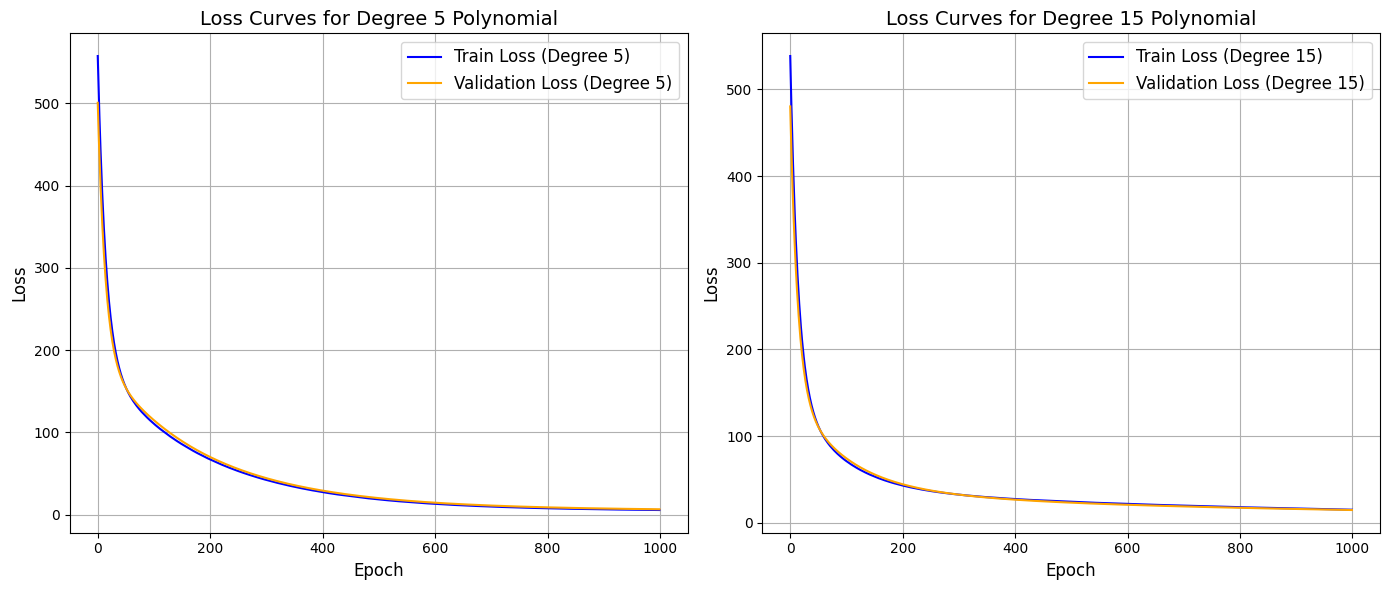

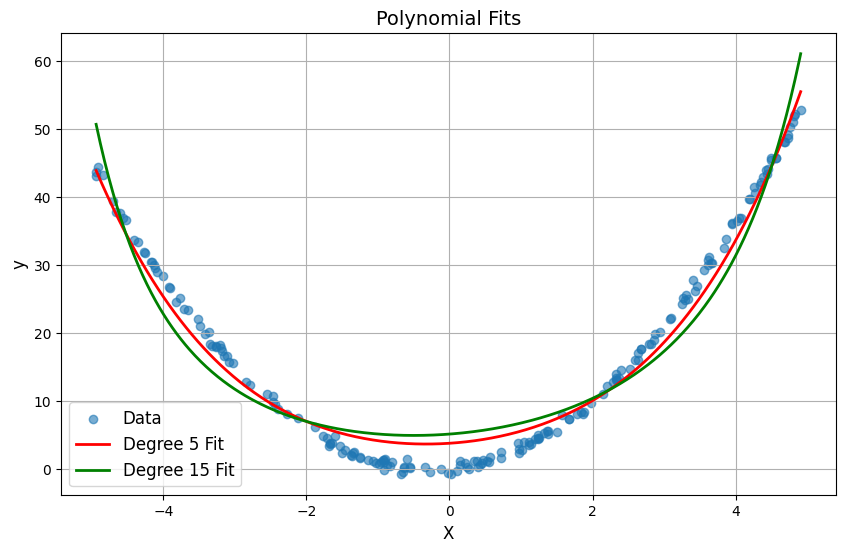

In [1119]:
# Plot training and validation losses for both models
plt.figure(figsize=(14, 6))

# Loss curves for degree 5
plt.subplot(1, 2, 1)
plt.plot(degree_5_train_losses, label="Train Loss (Degree 5)", color="blue")
plt.plot(degree_5_val_losses, label="Validation Loss (Degree 5)", color="orange")
plt.title("Loss Curves for Degree 5 Polynomial", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Loss curves for degree 15
plt.subplot(1, 2, 2)
plt.plot(degree_15_train_losses, label="Train Loss (Degree 15)", color="blue")
plt.plot(degree_15_val_losses, label="Validation Loss (Degree 15)", color="orange")
plt.title("Loss Curves for Degree 15 Polynomial", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot data and fitted models
X_plot = torch.linspace(-1, 1, 500).view(-1, 1)  # Normalized input range for smooth curves

with torch.no_grad():
    degree_5_fit = degree_5_model(X_plot)
    degree_15_fit = degree_15_model(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data", alpha=0.6)
plt.plot(X_plot * (X_max - X_min) / 2 + (X_max + X_min) / 2, degree_5_fit, label="Degree 5 Fit", color="red", linewidth=2)
plt.plot(X_plot * (X_max - X_min) / 2 + (X_max + X_min) / 2, degree_15_fit, label="Degree 15 Fit", color="green", linewidth=2)
plt.title("Polynomial Fits", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## 9. Gradient Descent for Non-linear Data


**Dataset**: Use the following code to generate a dataset of 100 samples:


In [1120]:

np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon



**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.


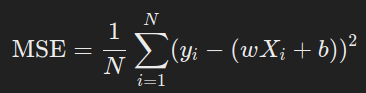

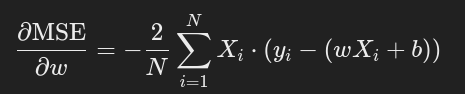

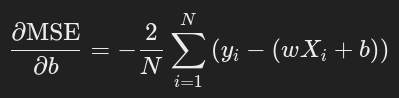

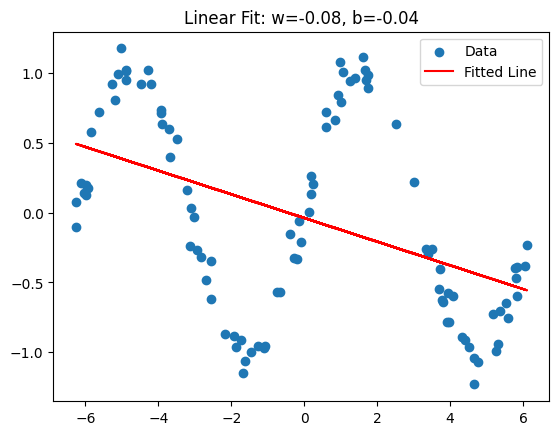

In [ ]:
w = 0.0
b = 0.0
alpha = 0.01  
epochs = 100 


for epoch in range(epochs): # GD
    y_pred = w * X + b
    error = y - y_pred
    
    dw = -2 * np.sum(X * error) / len(X)
    db = -2 * np.sum(error) / len(X)
    
    w -= alpha * dw
    b -= alpha * db

    
plt.scatter(X, y, label='Data')
plt.plot(X, w * X + b, color='red', label='Fitted Line')
plt.legend()
plt.title(f'Linear Fit: w={w:.2f}, b={b:.2f}')
plt.show()


Epoch [10/100], Loss: 0.6463
Epoch [20/100], Loss: 0.5593
Epoch [30/100], Loss: 0.5087
Epoch [40/100], Loss: 0.4748
Epoch [50/100], Loss: 0.4522
Epoch [60/100], Loss: 0.4372
Epoch [70/100], Loss: 0.4271
Epoch [80/100], Loss: 0.4204
Epoch [90/100], Loss: 0.4159
Epoch [100/100], Loss: 0.4129
Trained parameters: w=-0.0855, b=-0.1202


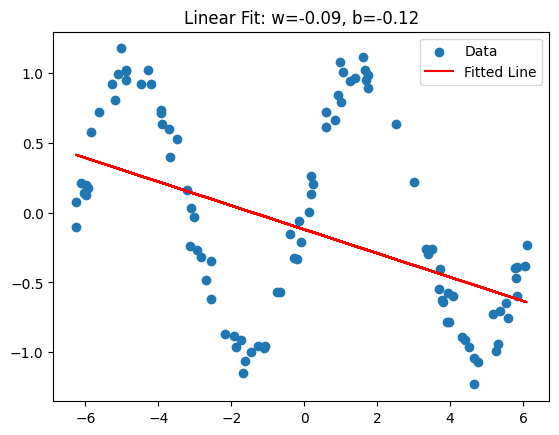

In [ ]:
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # Single input and single output

    def forward(self, x):
        return self.linear(x)

model = LinearModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 100
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

w, b = model.linear.weight.item(), model.linear.bias.item()
print(f"Trained parameters: w={w:.4f}, b={b:.4f}")

plt.scatter(X, y, label='Data')
plt.plot(X, w * X + b, color='red', label='Fitted Line')
plt.legend()
plt.title(f'Linear Fit: w={w:.2f}, b={b:.2f}')
plt.show()